# Path Loss Characteristic

This project aims for improving quality(Error Rate - RMSE) of **existing linear regression model**[^1] by applying variety of optimizing(machine learning) modeling techniques. <br>
The object function in residential area,
$$
L_{p}(d)[dB] = L_p(d_0) + 10nlog_{10}(d/d_{0}) + X_{\sigma}
$$

[^1]: Han-Shin Jo, and Jong-Gwan Yook. “Path Loss Characteristics for IMT-Advanced Systems in Residential and Street Environments.” IEEE Antennas and Wireless Propagation Letters 9 (2010): 867–871. Web.

In [176]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from LIN_REG.linreg import linearRegression, ridgeRegression, lassoRegression, polynomialRegression
from MLP.mlp_regression import mlp_regression
from MLP.utils import data_loader_pathloss, describeData

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Data Description

There are three types(3.4Ghz, 5.3Ghz, 6.4Ghz) of frequencies tested within two different urban areas(bh: Bundang, ma: Mokdong).
    - 3.4Ghz in Bundang (PLdata_bh_34.mat), in Mokdong (PLdata_ma_34.mat)
    - 5.3Ghz in Bundang (PLdata_bh_53.mat), in Mokdong (PLdata_ma_53.mat)
    - 6.4Ghz in Bundang (PLdata_bh_64.mat), in Mokdong (PLdata_ma_64.mat)

In [177]:
%autoreload

X_bh_34_train, y_bh_34_train, X_bh_34_val, y_bh_34_val, X_bh_34_test, y_bh_34_test = data_loader_pathloss("data/PLdata_bh_34.mat")
describeData(X_bh_34_train, y_bh_34_train, X_bh_34_val, y_bh_34_val, X_bh_34_test, y_bh_34_test, '3.4Ghz/Bundang Data Distribution')
X_bh_53_train, y_bh_53_train, X_bh_53_val, y_bh_53_val, X_bh_53_test, y_bh_53_test = data_loader_pathloss("data/PLdata_bh_53.mat")
describeData(X_bh_53_train, y_bh_53_train, X_bh_53_val, y_bh_53_val, X_bh_53_test, y_bh_53_test, '5.3Ghz/Bundang Data Distribution')
X_bh_64_train, y_bh_64_train, X_bh_64_val, y_bh_64_val, X_bh_64_test, y_bh_64_test = data_loader_pathloss("data/PLdata_bh_64.mat")
describeData(X_bh_64_train, y_bh_64_train, X_bh_64_val, y_bh_64_val, X_bh_64_test, y_bh_64_test, '6.4Ghz/Bundang Data Distribution')
X_ma_34_train, y_ma_34_train, X_ma_34_val, y_ma_34_val, X_ma_34_test, y_ma_34_test = data_loader_pathloss("data/PLdata_ma_34.mat")
describeData(X_ma_34_train, y_ma_34_train, X_ma_34_val, y_ma_34_val, X_ma_34_test, y_ma_34_test, '3.4Ghz/Mokdong Data Distribution')
X_ma_53_train, y_ma_53_train, X_ma_53_val, y_ma_53_val, X_ma_53_test, y_ma_53_test = data_loader_pathloss("data/PLdata_ma_53.mat")
describeData(X_ma_53_train, y_ma_53_train, X_ma_53_val, y_ma_53_val, X_ma_53_test, y_ma_53_test, '5.3Ghz/Mokdong Data Distribution')
X_ma_64_train, y_ma_64_train, X_ma_64_val, y_ma_64_val, X_ma_64_test, y_ma_64_test = data_loader_pathloss("data/PLdata_ma_64.mat")
describeData(X_ma_64_train, y_ma_64_train, X_ma_64_val, y_ma_64_val, X_ma_64_test, y_ma_64_test, '6.4Ghz/Mokdong Data Distribution')

3.4Ghz/Bundang Data Distribution
------------------------------------------------------------------------
        1.X_train   2.y_train    3.X_val    4.y_val   5.X_test   6.y_test
count  4591.00000  4591.00000  574.00000  574.00000  574.00000  574.00000
mean      2.41222   115.52460    2.41174  115.09171    2.41604  115.89099
std       0.22814    10.04831    0.23392    9.62576    0.22718   10.21544
min       1.69973    79.70000    1.70037   85.53000    1.69918   84.70000
25%       2.31702   110.53000    2.30625  109.37000    2.33498  110.20000
50%       2.47011   116.87000    2.47849  116.53000    2.45728  117.03000
75%       2.59803   122.03000    2.59800  121.20000    2.60028  122.20000
max       2.66794   147.53000    2.66802  142.53000    2.66786  147.53000

5.3Ghz/Bundang Data Distribution
------------------------------------------------------------------------
        1.X_train   2.y_train    3.X_val    4.y_val   5.X_test   6.y_test
count  4760.00000  4760.00000  595.00000  595.0

## 1. Linear Regression

### 1.a. Linear Regression (Least Square)

Linear Regression fits a linear model with coefficient w to minimize the residual sum of squares between observed y and prediction values. 
$$ \min_{w}||Xw - y||_2^2 $$

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


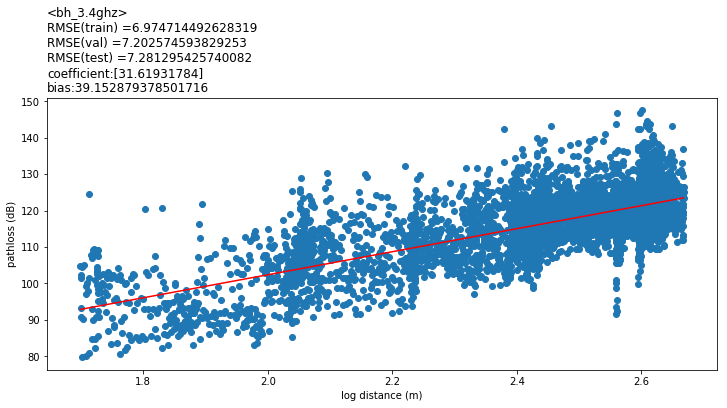

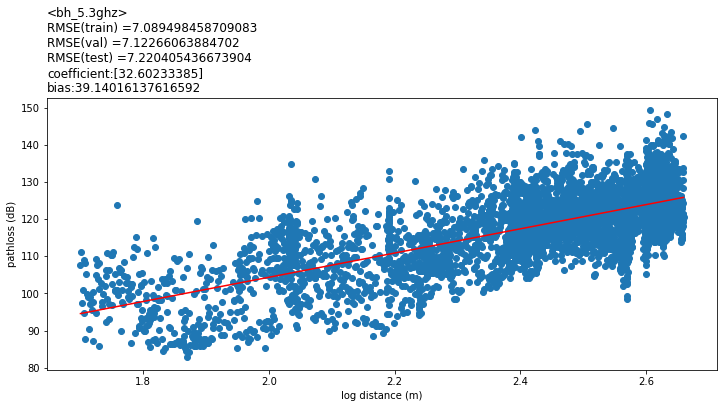

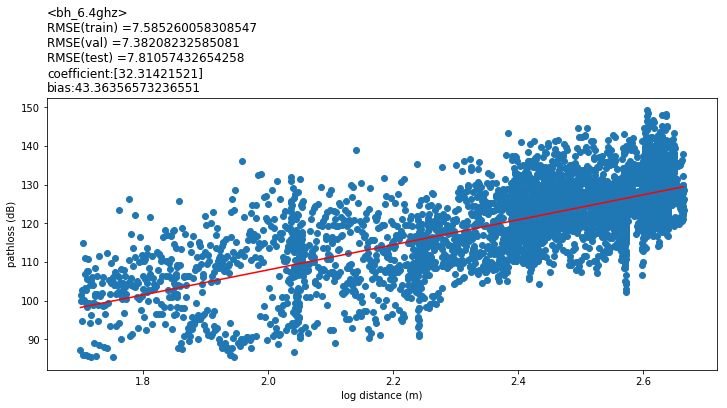

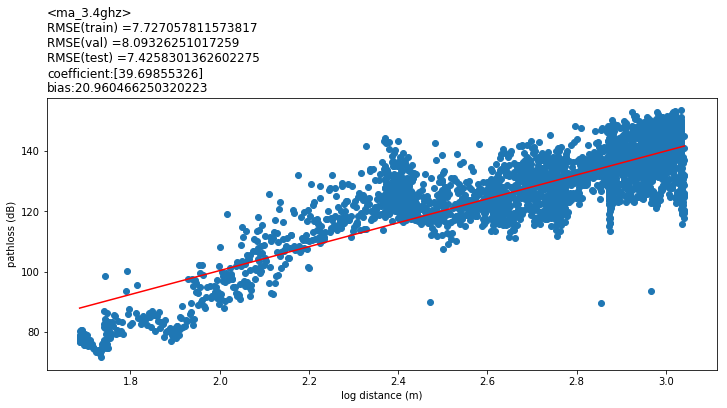

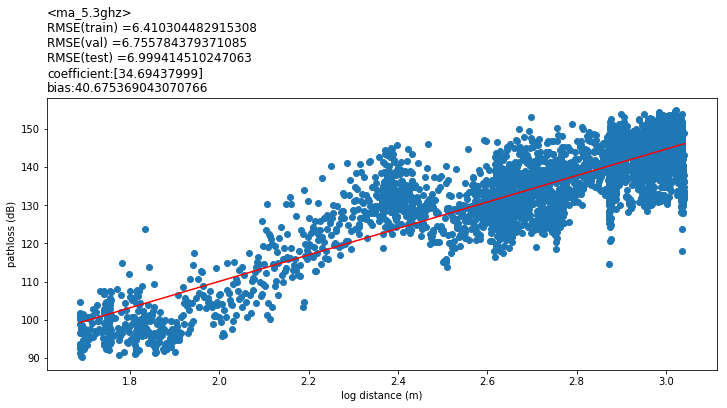

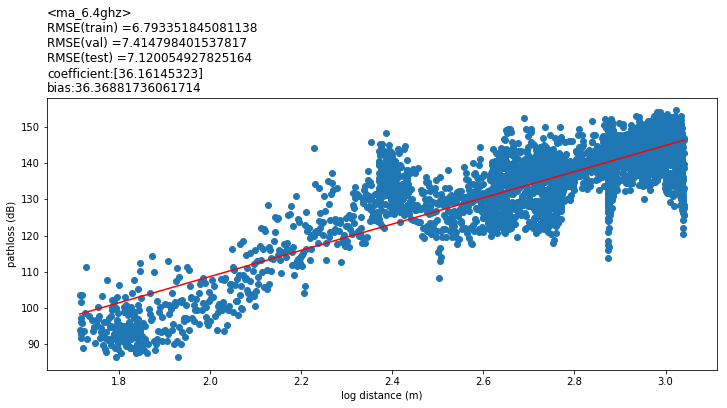

In [41]:
%autoreload
#linearRegression(X_train, y_train, X_val, y_val, X_test, y_test, label="test")
linearRegression(X_bh_34_train, y_bh_34_train, X_bh_34_val, y_bh_34_val, X_bh_34_test, y_bh_34_test,"bh_3.4ghz")
linearRegression(X_bh_53_train, y_bh_53_train, X_bh_53_val, y_bh_53_val, X_bh_53_test, y_bh_53_test,"bh_5.3ghz")
linearRegression(X_bh_64_train, y_bh_64_train, X_bh_64_val, y_bh_64_val, X_bh_64_test, y_bh_64_test,"bh_6.4ghz")
linearRegression(X_ma_34_train, y_ma_34_train, X_ma_34_val, y_ma_34_val, X_ma_34_test, y_ma_34_test,"ma_3.4ghz")
linearRegression(X_ma_53_train, y_ma_53_train, X_ma_53_val, y_ma_53_val, X_ma_53_test, y_ma_53_test,"ma_5.3ghz")
linearRegression(X_ma_64_train, y_ma_64_train, X_ma_64_val, y_ma_64_val, X_ma_64_test, y_ma_64_test,"ma_6.4ghz")

### 1.b. Ridge Regression
Ridge Regression adopts a penalty on size of coefficient(regularization) to avoid overfitting.
$$ \min_{w}||Xw - y||_2^2 + a||w||_2^2 $$

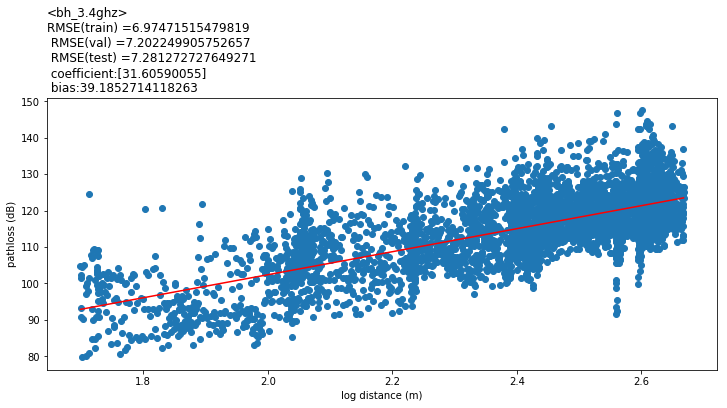

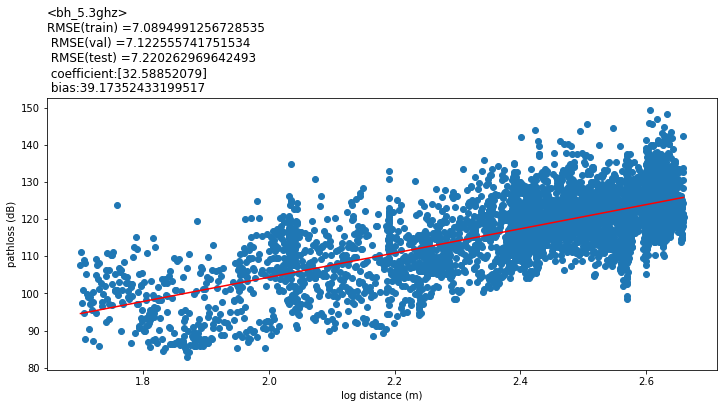

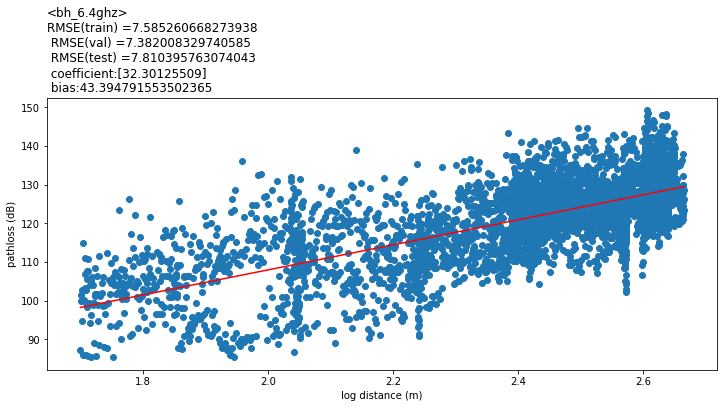

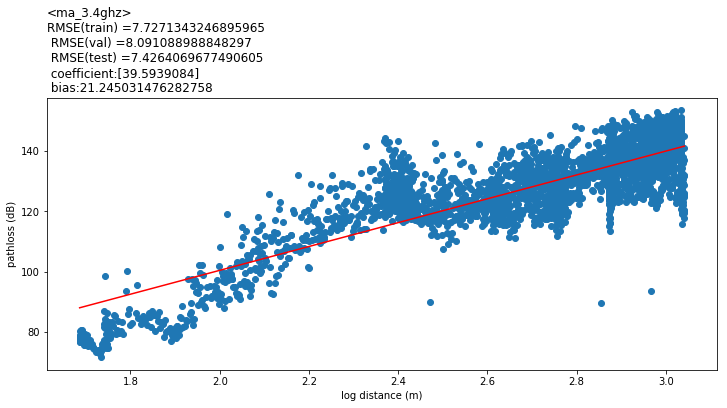

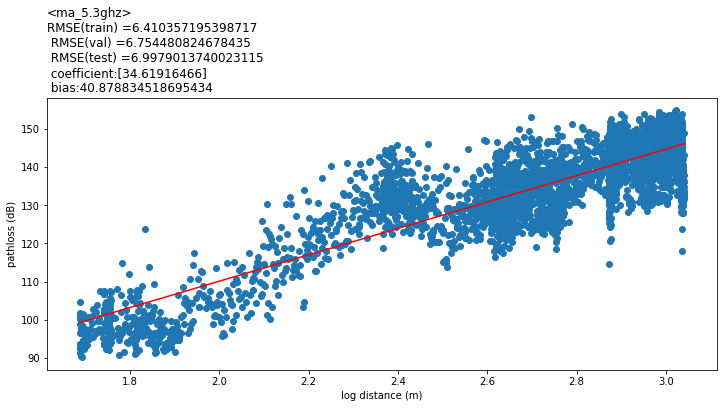

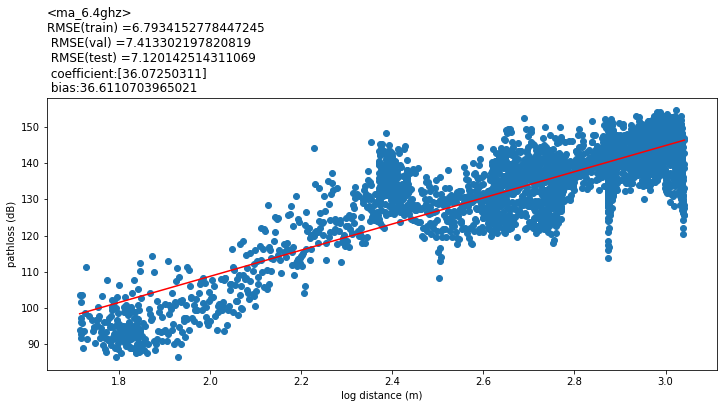

In [55]:
%autoreload

ridgeRegression(X_bh_34_train, y_bh_34_train, X_bh_34_val, y_bh_34_val, X_bh_34_test, y_bh_34_test,"bh_3.4ghz")
ridgeRegression(X_bh_53_train, y_bh_53_train, X_bh_53_val, y_bh_53_val, X_bh_53_test, y_bh_53_test,"bh_5.3ghz")
ridgeRegression(X_bh_64_train, y_bh_64_train, X_bh_64_val, y_bh_64_val, X_bh_64_test, y_bh_64_test,"bh_6.4ghz")
ridgeRegression(X_ma_34_train, y_ma_34_train, X_ma_34_val, y_ma_34_val, X_ma_34_test, y_ma_34_test,"ma_3.4ghz")
ridgeRegression(X_ma_53_train, y_ma_53_train, X_ma_53_val, y_ma_53_val, X_ma_53_test, y_ma_53_test,"ma_5.3ghz")
ridgeRegression(X_ma_64_train, y_ma_64_train, X_ma_64_val, y_ma_64_val, X_ma_64_test, y_ma_64_test,"ma_6.4ghz")

### 1.c. Lasso Regression

he Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent

$$ \min_{w}\frac{1}{2n_{samples}}||Xw - y||_2^2 + a||w||_2^2 $$

The lasso estimate thus solves the minimization of the least-squares penalty with  added, where  is a constant and  is the -norm of the parameter vector.

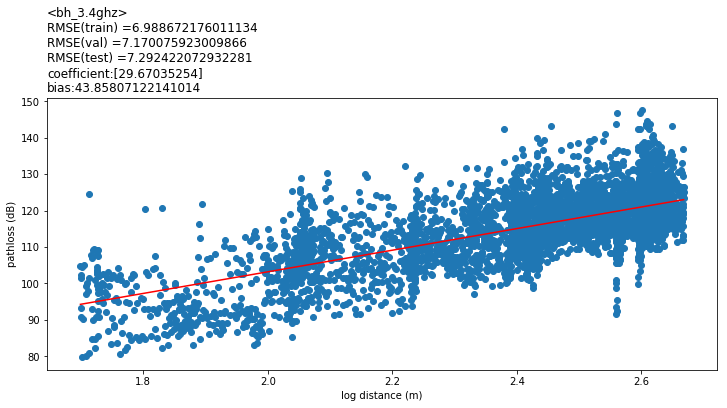

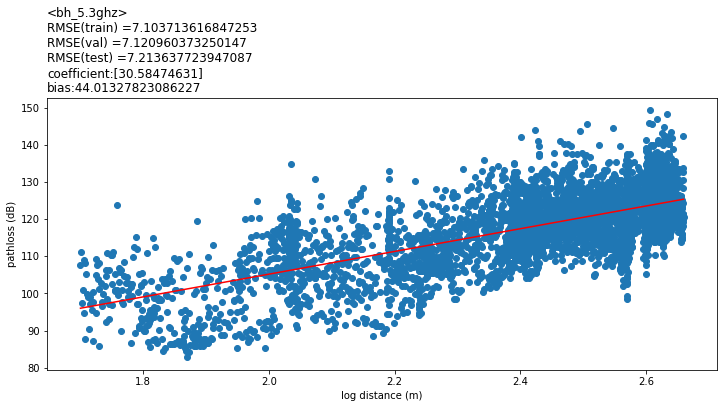

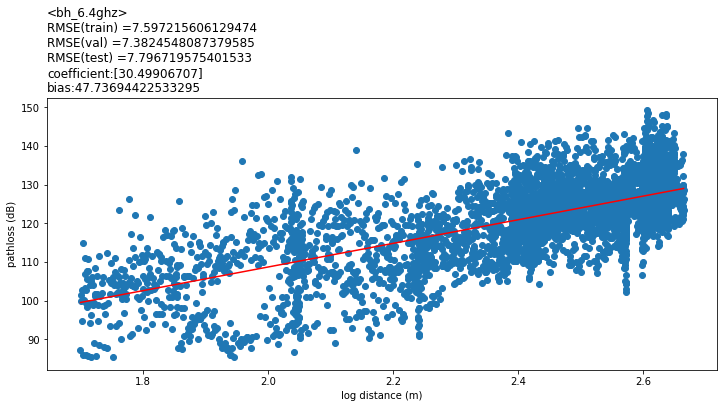

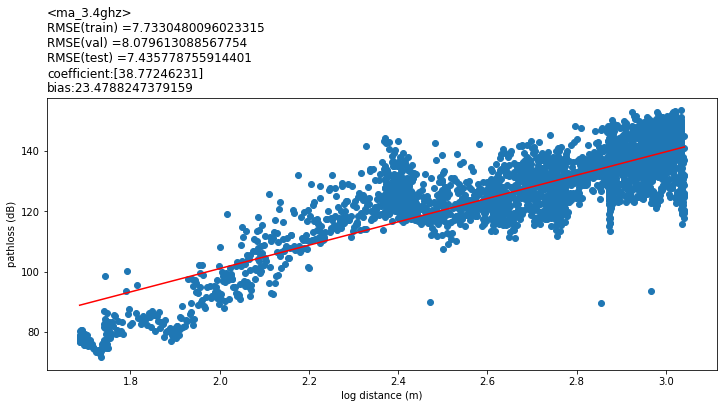

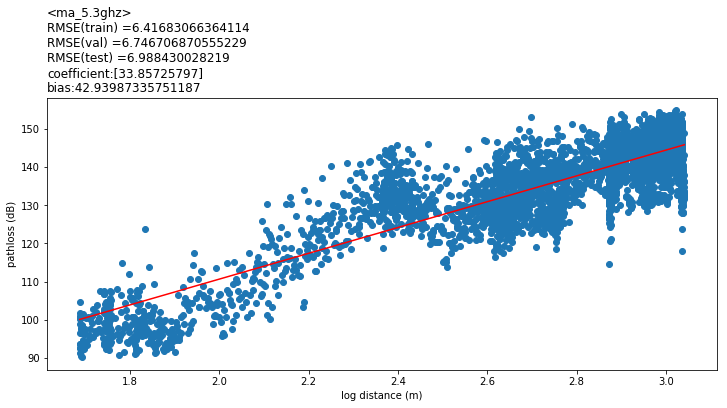

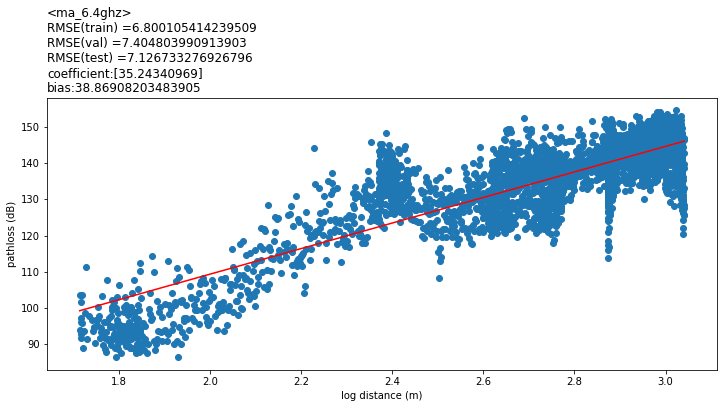

In [56]:
lassoRegression(X_bh_34_train, y_bh_34_train, X_bh_34_val, y_bh_34_val, X_bh_34_test, y_bh_34_test,"bh_3.4ghz")
lassoRegression(X_bh_53_train, y_bh_53_train, X_bh_53_val, y_bh_53_val, X_bh_53_test, y_bh_53_test,"bh_5.3ghz")
lassoRegression(X_bh_64_train, y_bh_64_train, X_bh_64_val, y_bh_64_val, X_bh_64_test, y_bh_64_test,"bh_6.4ghz")
lassoRegression(X_ma_34_train, y_ma_34_train, X_ma_34_val, y_ma_34_val, X_ma_34_test, y_ma_34_test,"ma_3.4ghz")
lassoRegression(X_ma_53_train, y_ma_53_train, X_ma_53_val, y_ma_53_val, X_ma_53_test, y_ma_53_test,"ma_5.3ghz")
lassoRegression(X_ma_64_train, y_ma_64_train, X_ma_64_val, y_ma_64_val, X_ma_64_test, y_ma_64_test,"ma_6.4ghz")

## 2. Nonlinear Regression

In order to derive better fitting model, increase dimesions by applying nonlinear combination of model parameters. The model is fitted by a method of successive approximation.

### 2.a. Polynomial Regression
A simple linear regression can be extended by constructing polynomial features from the coefficients.
For example, if an input sample is two dimensional and of the form $[x_1, x_2]$, the degree-2 polynomial features are
$$ z = [1, x_1, x_2, x_1^2, x_1x_2, x_2^2] $$
$$ \hat{y}(w,x) = w_0 + w_1z_1 + w_2z_2 + w_3z_3 + w_4z_4 + w_5z_5 $$
if an input sample is two dimensional and of the form $[x]$, the degree-2 polynomial features are
$$ z = [1, x, x^2] $$
$$ \hat{y}(w,x) = w_0 + w_1z_1 + w_2z_2 $$

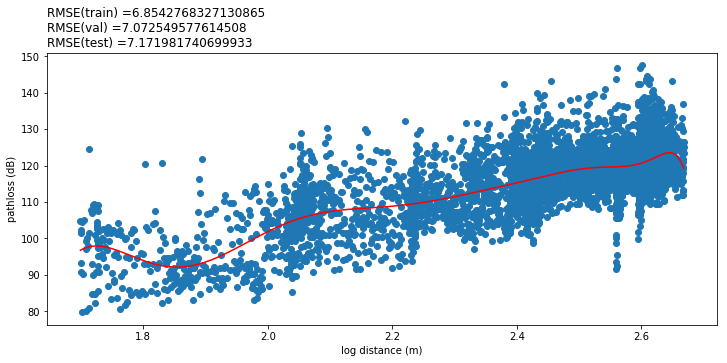

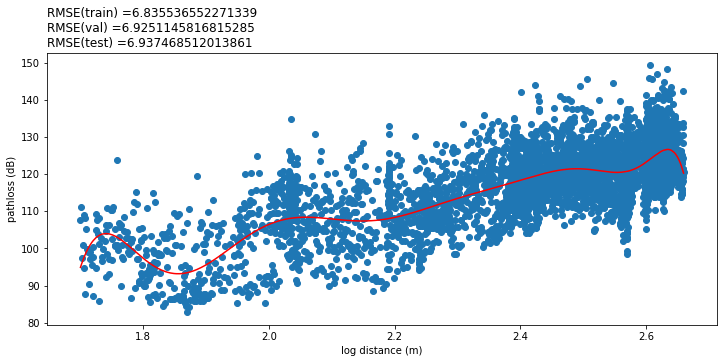

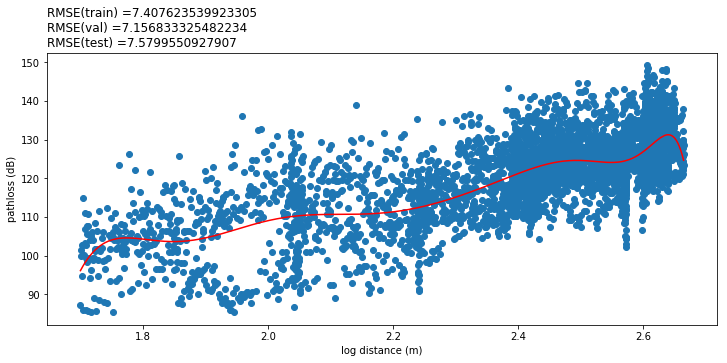

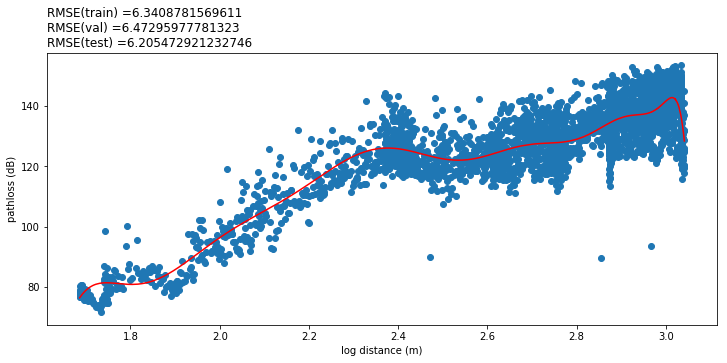

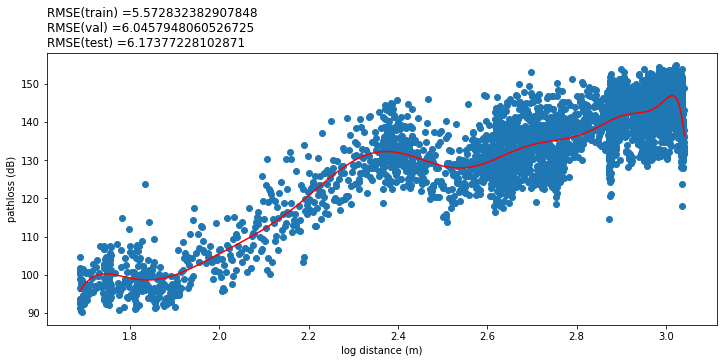

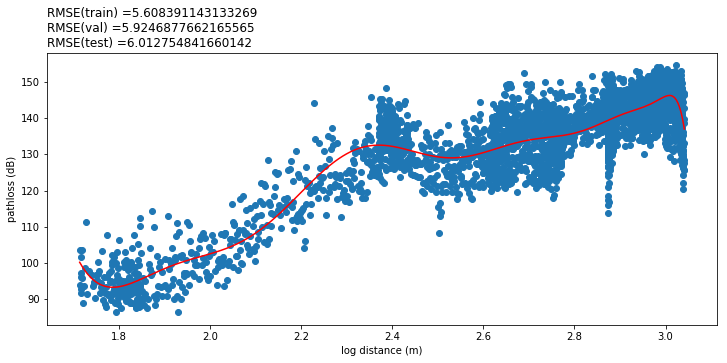

In [86]:
%autoreload
polynomialRegression(X_bh_34_train, y_bh_34_train, X_bh_34_val, y_bh_34_val, X_bh_34_test, y_bh_34_test,5 ,"bh_3.4ghz")
polynomialRegression(X_bh_53_train, y_bh_53_train, X_bh_53_val, y_bh_53_val, X_bh_53_test, y_bh_53_test,5 ,"bh_5.3ghz")
polynomialRegression(X_bh_64_train, y_bh_64_train, X_bh_64_val, y_bh_64_val, X_bh_64_test, y_bh_64_test,5 ,"bh_6.4ghz")
polynomialRegression(X_ma_34_train, y_ma_34_train, X_ma_34_val, y_ma_34_val, X_ma_34_test, y_ma_34_test,5 ,"ma_3.4ghz")
polynomialRegression(X_ma_53_train, y_ma_53_train, X_ma_53_val, y_ma_53_val, X_ma_53_test, y_ma_53_test,5 ,"ma_5.3ghz")
polynomialRegression(X_ma_64_train, y_ma_64_train, X_ma_64_val, y_ma_64_val, X_ma_64_test, y_ma_64_test,5 ,"ma_6.4ghz")

### 2.b. Neural-Net (Multi-Layer Perceptron)

A multilayer perceptron (MLP) is a class of feedforward artificial neural network. A MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function.

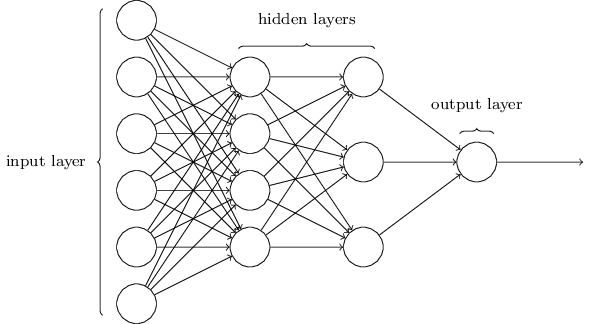

Using Multi-layer Perceptron regressor. (https://scikitlearn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

#### 2.2.1. RMSE trends upon # of hidden units
Based on 1 hidden layer(except input/output layer) environment, examine RMSE(Root Mean Squared Error) trends for increasing the number of hidden units with different activation functions(relu, sigmoid, tanh).
- Hidden Units Range: 1 ~ 100
- Layers: 3 (input - hidden layer(1) - output) 
- Data: 'PLdata.mat' from 3 sets(Train/Validation/Test = 8:1:1)
- Optimization: Quasi-Newton Method[^2].(Limited-memory BFGS[^3]).

[^2] https://en.wikipedia.org/wiki/Limited-memory_BFGS <br>
[^3] https://en.wikipedia.org/wiki/Quasi-Newton_method
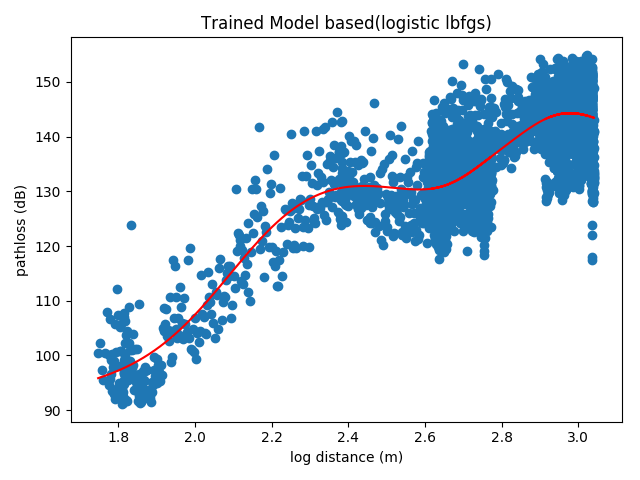
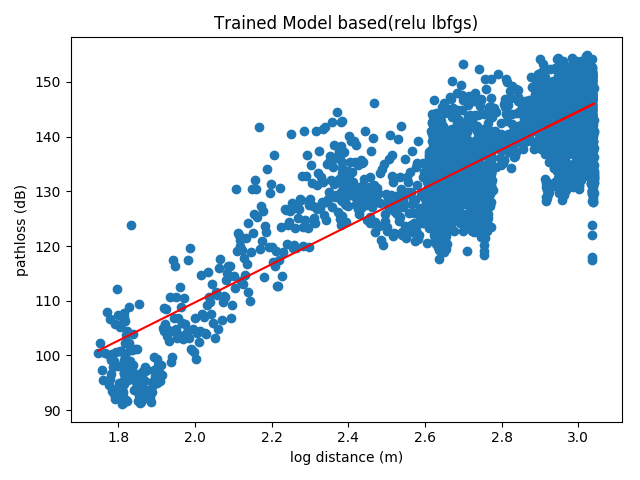
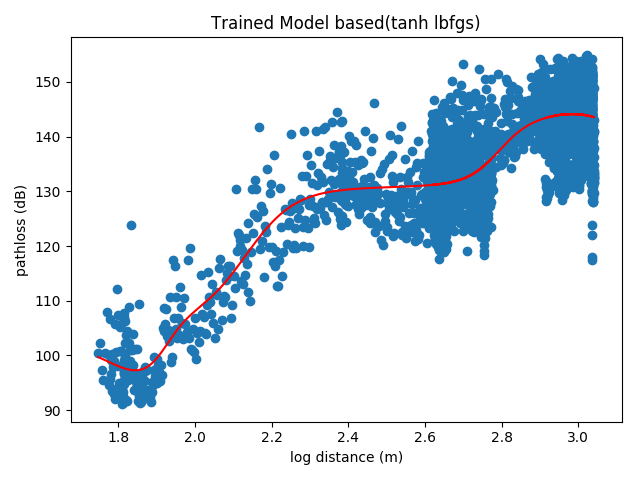

In [107]:
%autoreload
from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist
from MLP.utils import data_loader_pathloss

Xtrain, Ytrain, Xval, Yval, Xtest, Ytest = data_loader_pathloss("PLdata.mat")

#### 2.2.1.a. Relu activation function
$$g(x) = max(0, x)$$

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


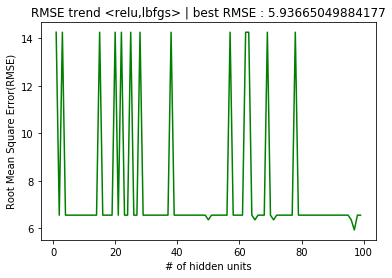

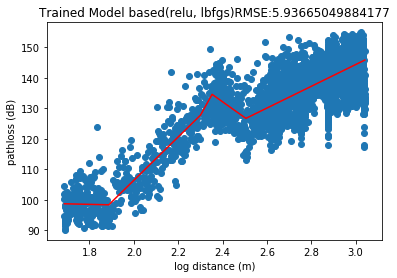

train_error(RMSE) : 5.800953239495357
validation_error(RMSE) : 5.93665049884177
test_error(RMSE) : 5.835474252133063


In [29]:
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(Xtrain, Ytrain, Xval, Yval, 'hu', 1, 100, 'relu', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, Xval, Yval)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, Xtrain, Ytrain, 'relu', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, Xtrain, Ytrain)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, Xval, Yval)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, Xtest, Ytest)))

#### 2.2.1.b. Sigmoid activation function
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

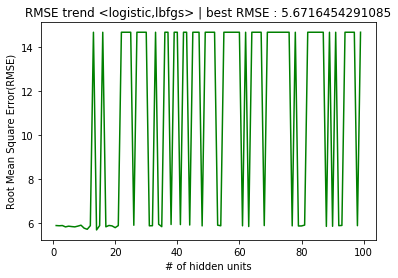

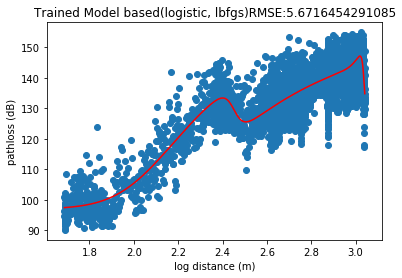

train_error(RMSE) : 5.671083245565019
validation_error(RMSE) : 5.6716454291085
test_error(RMSE) : 5.768122504694775


In [3]:
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(Xtrain, Ytrain, Xval, Yval, 'hu', 1, 100, 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, Xval, Yval)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, Xtrain, Ytrain, 'logistic', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, Xtrain, Ytrain)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, Xval, Yval)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, Xtest, Ytest)))

#### 2.2.1.c. Tanh activation function
$$tanh(z) = \frac{sinh(z)}{cosh(z)} = \frac{e^z-e^{-z}}{e^z+e^{-z}}$$

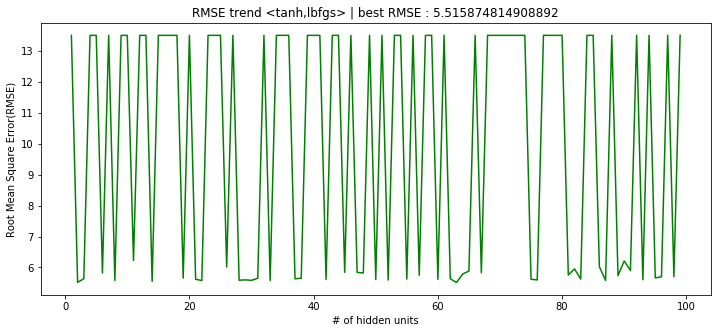

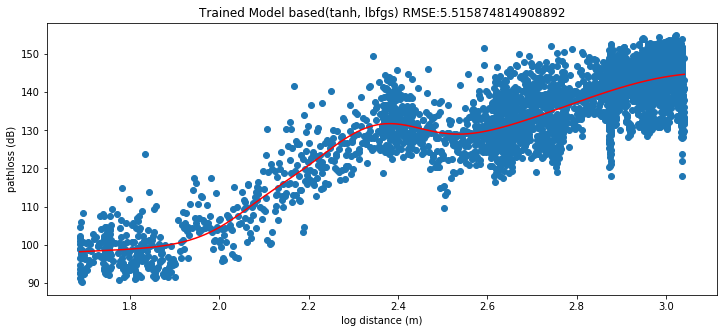

train_error(RMSE) : 5.858692603829557
validation_error(RMSE) : 5.515874814908892
test_error(RMSE) : 5.854212298414366


In [87]:
# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(Xtrain, Ytrain, Xval, Yval, 'hu', 1, 100, 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, Xval, Yval)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, Xtrain, Ytrain, 'tanh', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, Xtrain, Ytrain)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, Xval, Yval)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, Xtest, Ytest)))

#### 2.2.2. RMSE trends upon # of hidden layers
Based on 60 hidden units on each layers, examine RMSE(Root Mean Squared Error) trends for increasing the number of hidden units with different activation functions(relu, sigmoid, tanh).
- Hidden Units: 60
- Hidden Layers Range: 1~30 (step: 1) 
- Data: 'PLdata.mat' from 3 sets(Train/Validation/Test = 8:1:1)
- Optimization: Quasi-Newton Method[^2].(Limited-memory BFGS[^3]).

[^2] https://en.wikipedia.org/wiki/Limited-memory_BFGS <br>
[^3] https://en.wikipedia.org/wiki/Quasi-Newton_method

#### 2.2.2.a. Relu activation function
$$g(x) = max(0, x)$$
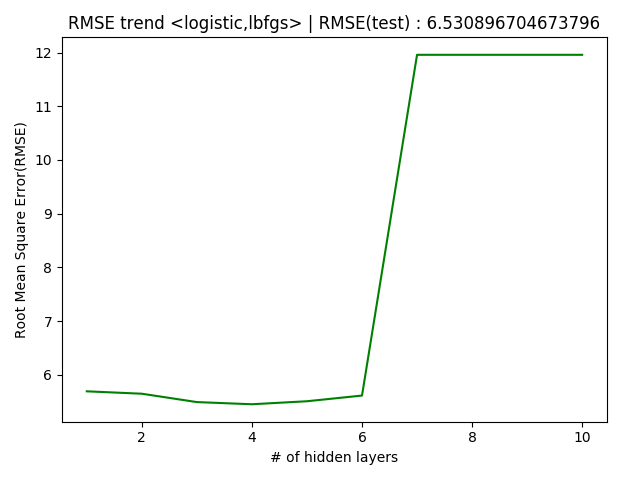
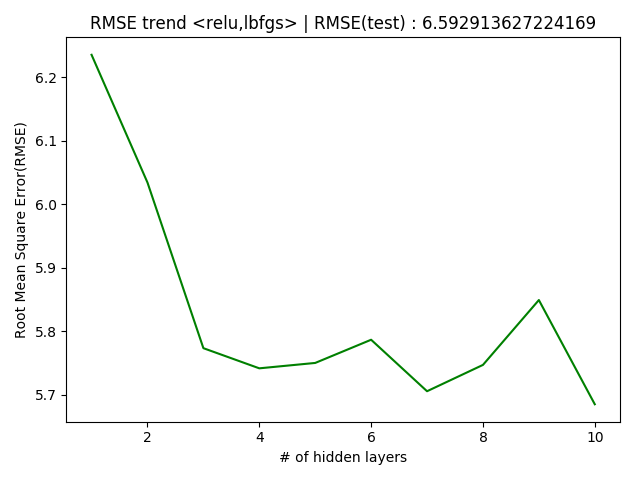
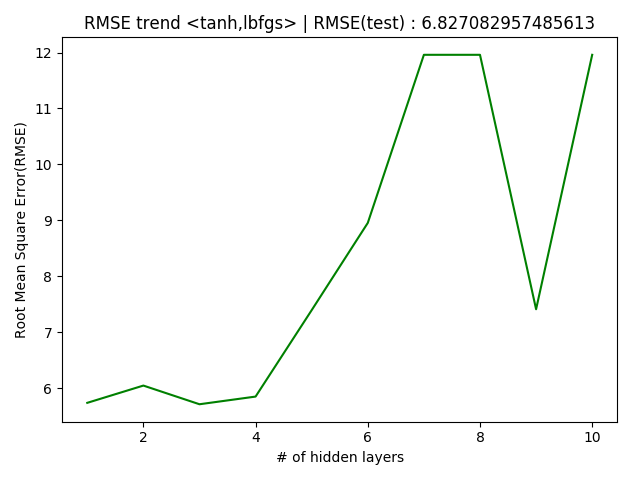

#hidden_layer: (60,) / hidden_units:60 / RMSE:6.676599228589933
#hidden_layer: (60, 60) / hidden_units:60 / RMSE:6.676596650570014
#hidden_layer: (60, 60, 60) / hidden_units:60 / RMSE:6.676595117921218
#hidden_layer: (60, 60, 60, 60) / hidden_units:60 / RMSE:5.910217455355608
#hidden_layer: (60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.290528337875459
#hidden_layer: (60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:5.925139854624004
#hidden_layer: (60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:5.915503487096499
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:5.901579050447421
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:5.931483380358742
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:5.935667378581642
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:5.91994768976385
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMS

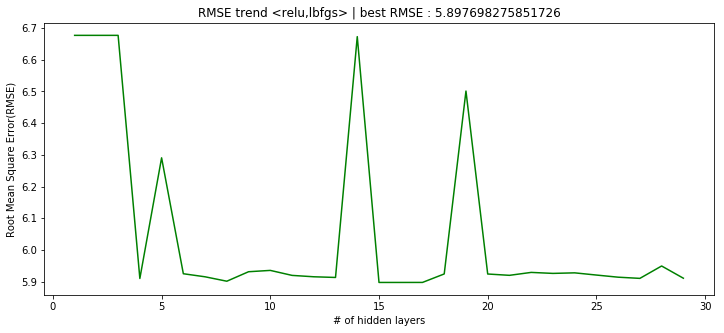

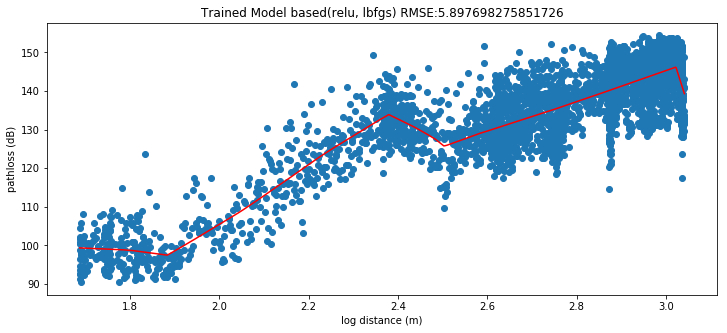

train_error(RMSE) : 5.6153648607967375
validation_error(RMSE) : 5.897698275851726
test_error(RMSE) : 5.9518977879120865


In [88]:
%autoreload

# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(Xtrain, Ytrain, Xval, Yval, 'hl', 30, 60, 'relu', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, Xval, Yval)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, Xtrain, Ytrain, 'relu', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, Xtrain, Ytrain)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, Xval, Yval)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, Xtest, Ytest)))

#### 2.2.2.b. Sigmoid activation function
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

#hidden_layer: (60,) / hidden_units:60 / RMSE:5.903850569331024
#hidden_layer: (60, 60) / hidden_units:60 / RMSE:5.893596458133375
#hidden_layer: (60, 60, 60) / hidden_units:60 / RMSE:5.949528620015382
#hidden_layer: (60, 60, 60, 60) / hidden_units:60 / RMSE:5.888455214876984
#hidden_layer: (60, 60, 60, 60, 60) / hidden_units:60 / RMSE:5.947887902104224
#hidden_layer: (60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:13.864029088516626
#hidden_layer: (60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:13.864026731883785
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:13.864027043846253
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:13.86402779229511
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:13.86402671622217
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:13.864026991714328
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 

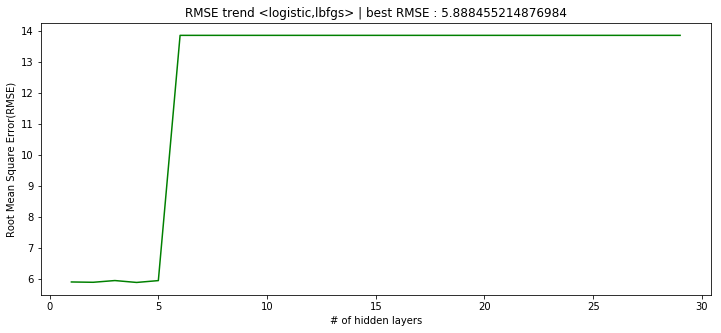

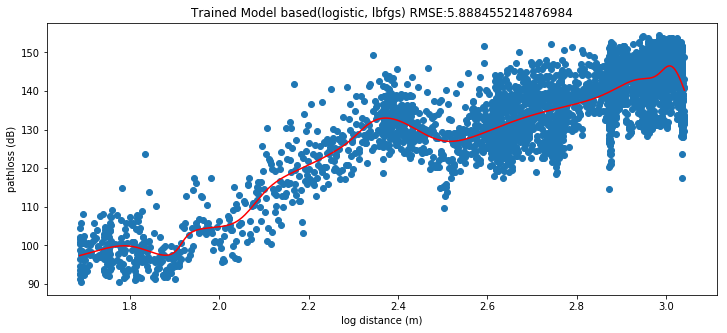

train_error(RMSE) : 5.616660381935704
validation_error(RMSE) : 5.888455214876984
test_error(RMSE) : 5.940607868578936


In [89]:
%autoreload

# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(Xtrain, Ytrain, Xval, Yval, 'hl', 30, 60, 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, Xval, Yval)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, Xtrain, Ytrain, 'logistic', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, Xtrain, Ytrain)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, Xval, Yval)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, Xtest, Ytest)))

#### 2.2.2.c. Tanh activation function
$$tanh(z) = \frac{sinh(z)}{cosh(z)} = \frac{e^z-e^{-z}}{e^z+e^{-z}}$$

#hidden_layer: (60,) / hidden_units:60 / RMSE:5.939046378883017
#hidden_layer: (60, 60) / hidden_units:60 / RMSE:6.24953397956904
#hidden_layer: (60, 60, 60) / hidden_units:60 / RMSE:5.8671997366100825
#hidden_layer: (60, 60, 60, 60) / hidden_units:60 / RMSE:5.950519877690987
#hidden_layer: (60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.0572664248144585
#hidden_layer: (60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:5.940606707433932
#hidden_layer: (60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:6.008335426047618
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:13.864030946775289
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:13.864027187947134
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:13.864026641696888
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60 / RMSE:13.864028477090178
#hidden_layer: (60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60) / hidden_units:60

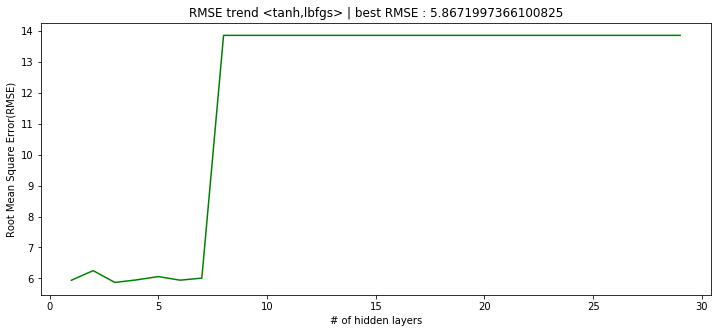

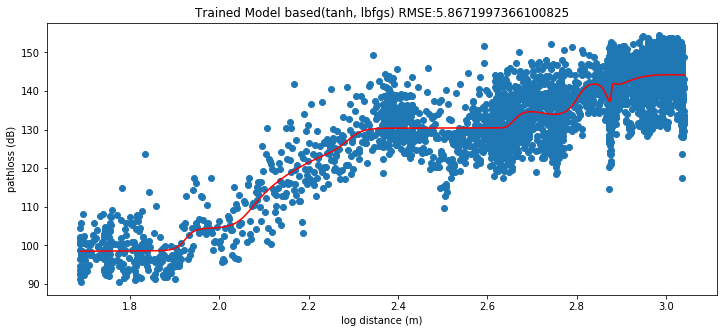

train_error(RMSE) : 5.714299554206172
validation_error(RMSE) : 5.8671997366100825
test_error(RMSE) : 6.066279023541394


In [90]:
%autoreload

# model_validation(Xtrain, Ytrain, mode, max_layers, max_unit, activation, loss)
model = model_validation(Xtrain, Ytrain, Xval, Yval, 'hl', 30, 60, 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, Xval, Yval)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, Xtrain, Ytrain, 'tanh', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, Xtrain, Ytrain)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, Xval, Yval)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, Xtest, Ytest)))

#### 2.2.3. Training Model for different data set (location, frequency)
Based on fixed network architecture(hidden layers/units : 60-> 60-> 60-> 60-> 60-> 60), train nonlinear regression model with different activation functions(relu, sigmoid, tanh).
- Neural Network Architecture: input(1)-> 60-> 60-> 60-> 60-> 60-> 60-> output(1)
- Data: 
    - PLdata_bh_34.mat: 3.4ghz Bundang
    - PLdata_bh_53.mat: 5.3ghz Bundang
    - PLdata_bh_64.mat: 6.4ghz Bundang
    - PLdata_ma_34.mat: 3.4ghz Mokdong
    - PLdata_ma_53.mat: 5.3ghz Mokdong
    - PLdata_ma_64.mat: 6.4ghz Mokdong<br>
(Extracted 3 subsets(Train/Validation/Test = 8:1:1))
- Optimization: Quasi-Newton Method[^2].(Limited-memory BFGS[^3]).

#### 2.2.3.a. Relu activation function

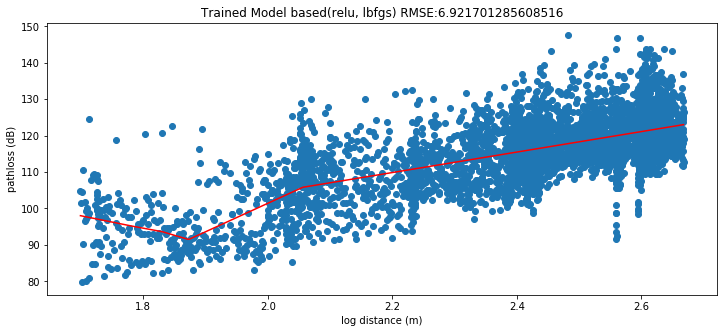

train_error(RMSE) : 6.921701285608516
validation_error(RMSE) : 6.872927775298263
test_error(RMSE) : 7.034218268937688
-----------------------------------------------------------------------------------------------


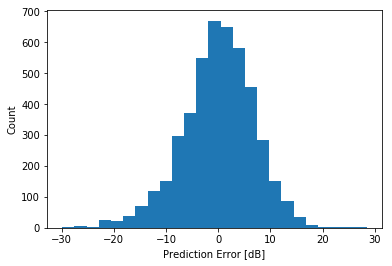

       Error(Noise) Distribution
count                4591.000000
mean                    0.001337
std                     6.922455
min                   -29.863908
25%                    -4.043503
50%                     0.352752
75%                     4.612090
max                    28.461410


In [114]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_bh_34_train, y_bh_34_train, (60,60,60,60,60,60), 'relu', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_bh_34_train, y_bh_34_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_bh_34_train, y_bh_34_train, 'relu', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_34_train, y_bh_34_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_34_val, y_bh_34_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_34_test, y_bh_34_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_bh_34_train), y_bh_34_train)

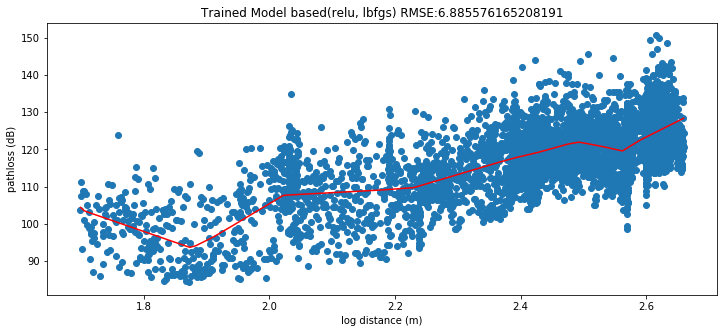

train_error(RMSE) : 6.885576165208191
validation_error(RMSE) : 6.8473933290151106
test_error(RMSE) : 6.863922613585994
-----------------------------------------------------------------------------------------------


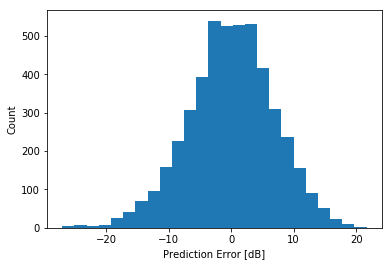

       Error(Noise) Distribution
count                4760.000000
mean                    0.001353
std                     6.886299
min                   -26.991231
25%                    -4.279896
50%                     0.208891
75%                     4.584658
max                    21.682985


In [117]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_bh_53_train, y_bh_53_train, (60,60,60,60,60,60), 'relu', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_bh_53_train, y_bh_53_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_bh_53_train, y_bh_53_train, 'relu', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_53_train, y_bh_53_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_53_val, y_bh_53_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_53_test, y_bh_53_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_bh_53_train), y_bh_53_train)

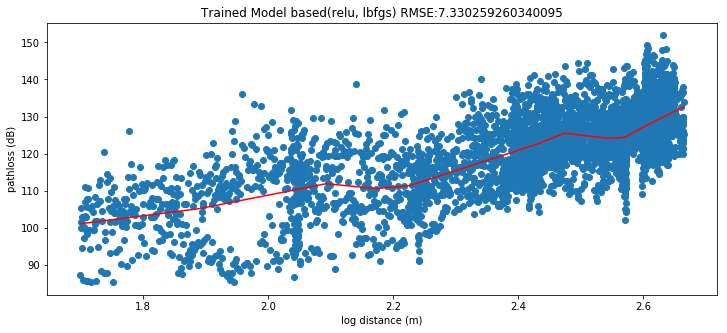

train_error(RMSE) : 7.330259260340095
validation_error(RMSE) : 7.721428825262841
test_error(RMSE) : 7.7355506123662705
-----------------------------------------------------------------------------------------------


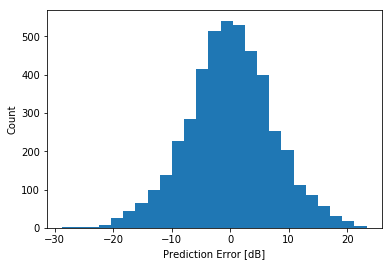

       Error(Noise) Distribution
count                4524.000000
mean                   -0.001539
std                     7.331069
min                   -28.700504
25%                    -4.641340
50%                     0.007950
75%                     4.728181
max                    23.331218


In [120]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_bh_64_train, y_bh_64_train, (60,60,60,60,60,60), 'relu', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_bh_64_train, y_bh_64_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_bh_64_train, y_bh_64_train, 'relu', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_64_train, y_bh_64_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_64_val, y_bh_64_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_64_test, y_bh_64_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_bh_64_train), y_bh_64_train)

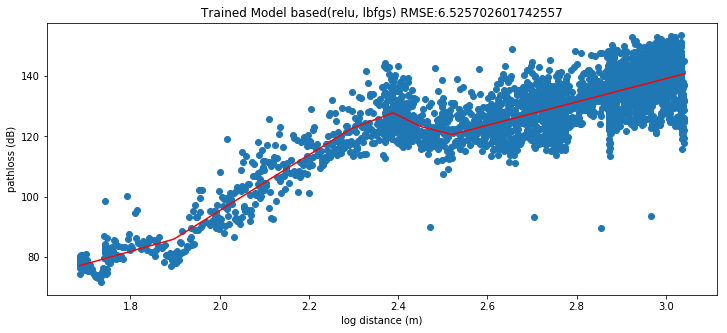

train_error(RMSE) : 6.525702601742557
validation_error(RMSE) : 6.687272795152486
test_error(RMSE) : 6.441188595928402
-----------------------------------------------------------------------------------------------


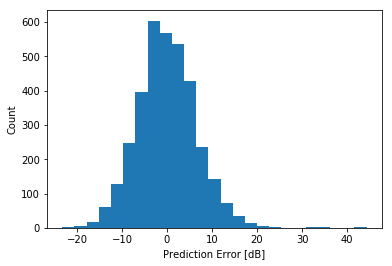

       Error(Noise) Distribution
count                3504.000000
mean                    0.001834
std                     6.526634
min                   -23.246321
25%                    -4.231324
50%                    -0.222052
75%                     4.152187
max                    44.346554


In [121]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_ma_34_train, y_ma_34_train, (60,60,60,60,60,60), 'relu', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_ma_34_train, y_ma_34_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_ma_34_train, y_ma_34_train, 'relu', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_34_train, y_ma_34_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_34_val, y_ma_34_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_34_test, y_ma_34_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_ma_34_train), y_ma_34_train)

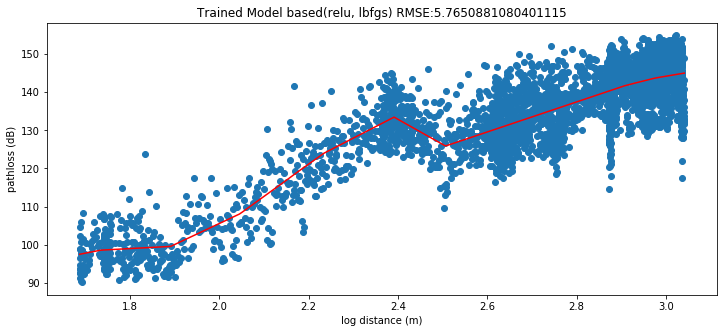

train_error(RMSE) : 5.7650881080401115
validation_error(RMSE) : 6.125349915801955
test_error(RMSE) : 5.68839823454277
-----------------------------------------------------------------------------------------------


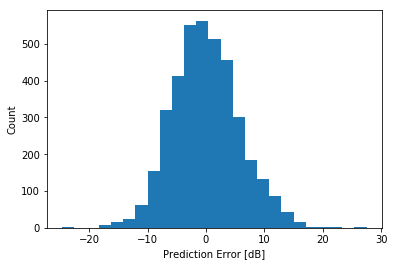

       Error(Noise) Distribution
count                3853.000000
mean                    0.012544
std                     5.765823
min                   -24.588250
25%                    -3.948651
50%                    -0.279489
75%                     3.594399
max                    27.510568


In [122]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_ma_53_train, y_ma_53_train, (60,60,60,60,60,60), 'relu', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_ma_53_train, y_ma_53_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_ma_53_train, y_ma_53_train, 'relu', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_53_train, y_ma_53_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_53_val, y_ma_53_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_53_test, y_ma_53_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_ma_53_train), y_ma_53_train)

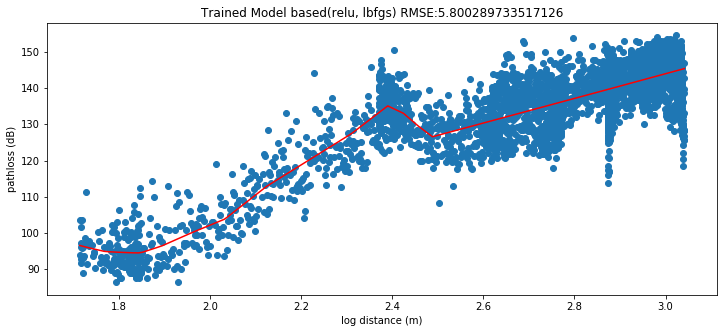

train_error(RMSE) : 5.800289733517126
validation_error(RMSE) : 5.761502894724058
test_error(RMSE) : 5.669116701240873
-----------------------------------------------------------------------------------------------


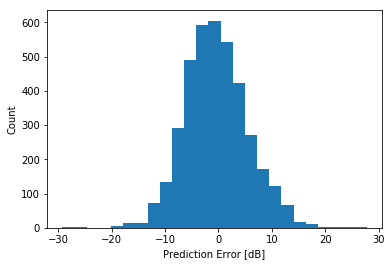

       Error(Noise) Distribution
count                3853.000000
mean                   -0.408413
std                     5.885484
min                   -29.241523
25%                    -4.425966
50%                    -0.719496
75%                     3.279436
max                    27.773621


In [123]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_ma_64_train, y_ma_64_train, (60,60,60,60,60,60), 'relu', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_ma_64_train, y_ma_64_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_ma_64_train, y_ma_64_train, 'relu', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_64_train, y_ma_64_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_64_val, y_ma_64_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_64_test, y_ma_64_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_ma_53_train), y_ma_53_train)

#### 2.2.3.b. Tanh activation function

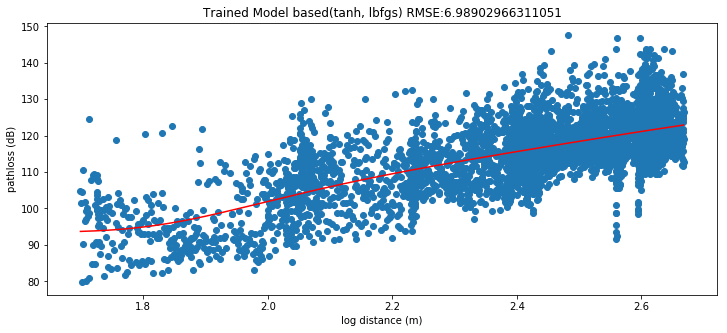

train_error(RMSE) : 6.98902966311051
validation_error(RMSE) : 6.946565763445617
test_error(RMSE) : 7.092098322476956
-----------------------------------------------------------------------------------------------


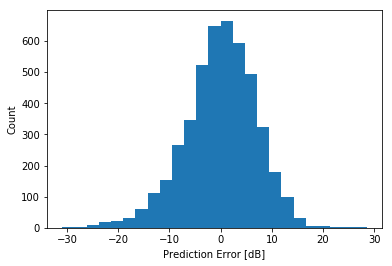

       Error(Noise) Distribution
count                4591.000000
mean                    0.014896
std                     6.989775
min                   -30.916101
25%                    -4.114081
50%                     0.433579
75%                     4.744705
max                    28.548694


In [124]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_bh_34_train, y_bh_34_train, (60,60,60,60,60,60), 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_bh_34_train, y_bh_34_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_bh_34_train, y_bh_34_train, 'tanh', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_34_train, y_bh_34_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_34_val, y_bh_34_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_34_test, y_bh_34_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_bh_34_train), y_bh_34_train)

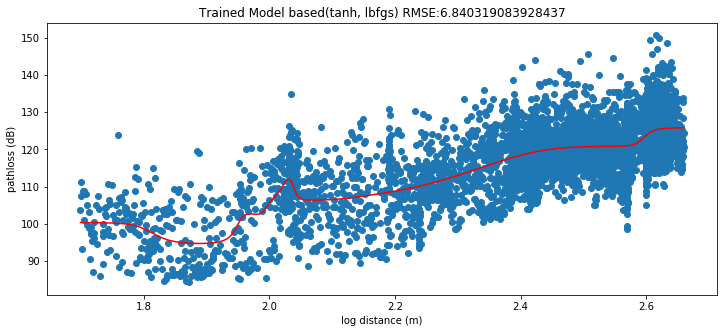

train_error(RMSE) : 6.840319083928437
validation_error(RMSE) : 6.910500982033648
test_error(RMSE) : 6.890411574201372
-----------------------------------------------------------------------------------------------


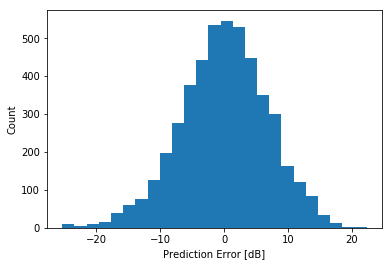

       Error(Noise) Distribution
count                4760.000000
mean                    0.003579
std                     6.841037
min                   -25.354600
25%                    -4.368157
50%                     0.210858
75%                     4.624538
max                    22.325062


In [125]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_bh_53_train, y_bh_53_train, (60,60,60,60,60,60), 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_bh_53_train, y_bh_53_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_bh_53_train, y_bh_53_train, 'tanh', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_53_train, y_bh_53_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_53_val, y_bh_53_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_53_test, y_bh_53_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_bh_53_train), y_bh_53_train)

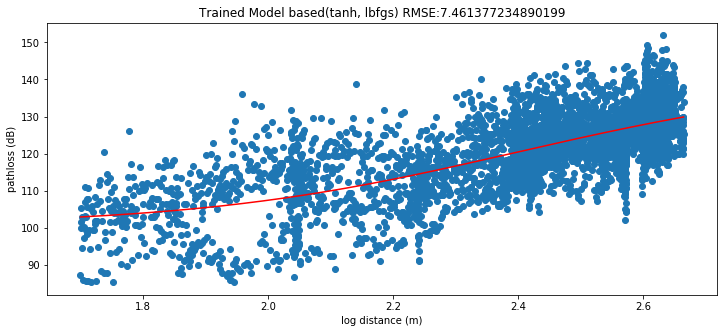

train_error(RMSE) : 7.461377234890199
validation_error(RMSE) : 7.926428922445638
test_error(RMSE) : 7.845962531308943
-----------------------------------------------------------------------------------------------


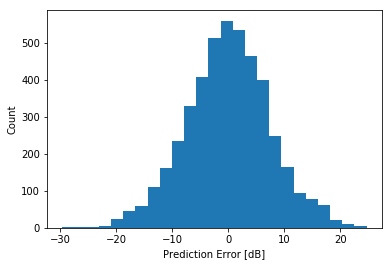

       Error(Noise) Distribution
count                4524.000000
mean                    0.002628
std                     7.462202
min                   -29.602140
25%                    -4.703571
50%                     0.085119
75%                     4.861522
max                    24.669873


In [128]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_bh_64_train, y_bh_64_train, (60,60,60,60,60,60), 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_bh_64_train, y_bh_64_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_bh_64_train, y_bh_64_train, 'tanh', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_64_train, y_bh_64_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_64_val, y_bh_64_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_64_test, y_bh_64_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_bh_64_train), y_bh_64_train)

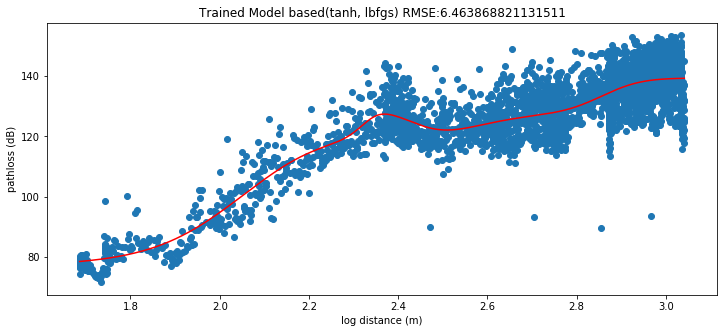

train_error(RMSE) : 6.463868821131511
validation_error(RMSE) : 6.67389998696144
test_error(RMSE) : 6.419405489707631
-----------------------------------------------------------------------------------------------


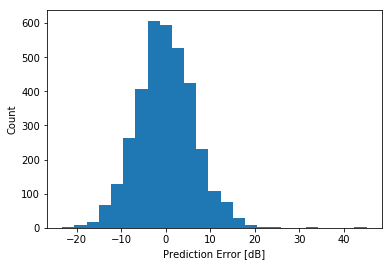

       Error(Noise) Distribution
count                3504.000000
mean                   -0.023900
std                     6.464747
min                   -23.262454
25%                    -4.252018
50%                    -0.242707
75%                     4.103252
max                    45.084065


In [127]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_ma_34_train, y_ma_34_train, (60,60,60,60,60,60), 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_ma_34_train, y_ma_34_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_ma_34_train, y_ma_34_train, 'tanh', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_34_train, y_ma_34_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_34_val, y_ma_34_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_34_test, y_ma_34_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_ma_34_train), y_ma_34_train)

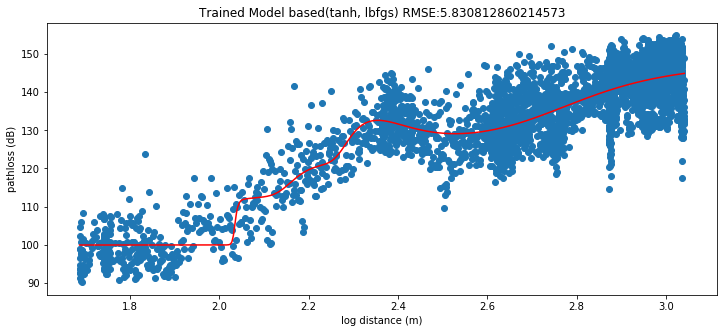

train_error(RMSE) : 5.830812860214573
validation_error(RMSE) : 6.1836300435410045
test_error(RMSE) : 5.836740396558711
-----------------------------------------------------------------------------------------------


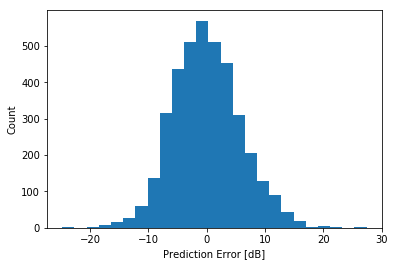

       Error(Noise) Distribution
count                3853.000000
mean                    0.000091
std                     5.831570
min                   -24.789075
25%                    -4.063422
50%                    -0.243343
75%                     3.641039
max                    27.445973


In [130]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_ma_53_train, y_ma_53_train, (60,60,60,60,60,60), 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_ma_53_train, y_ma_53_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_ma_53_train, y_ma_53_train, 'tanh', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_53_train, y_ma_53_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_53_val, y_ma_53_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_53_test, y_ma_53_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_ma_53_train), y_ma_53_train)

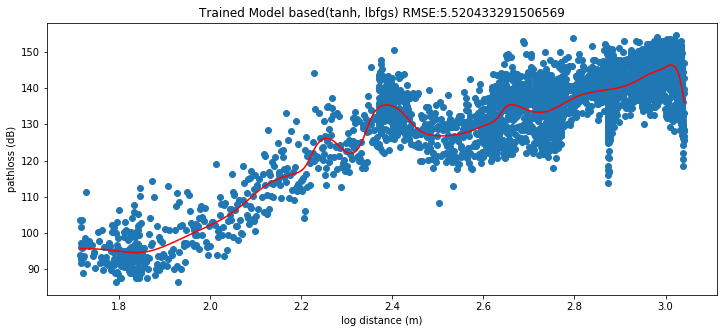

train_error(RMSE) : 5.520433291506569
validation_error(RMSE) : 5.531705529286491
test_error(RMSE) : 5.5058979326514885
-----------------------------------------------------------------------------------------------


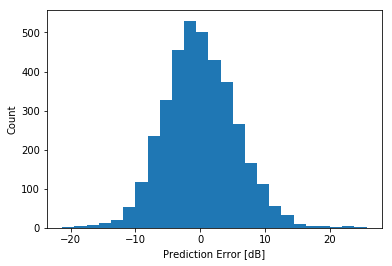

       Error(Noise) Distribution
count                3723.000000
mean                    0.018588
std                     5.521144
min                   -21.281616
25%                    -3.619481
50%                    -0.206200
75%                     3.578518
max                    25.678476


In [131]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_ma_64_train, y_ma_64_train, (60,60,60,60,60,60), 'tanh', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_ma_64_train, y_ma_64_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_ma_64_train, y_ma_64_train, 'tanh', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_64_train, y_ma_64_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_64_val, y_ma_64_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_64_test, y_ma_64_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_ma_64_train), y_ma_64_train)

#### 2.2.3.c. Sigmoid activation function

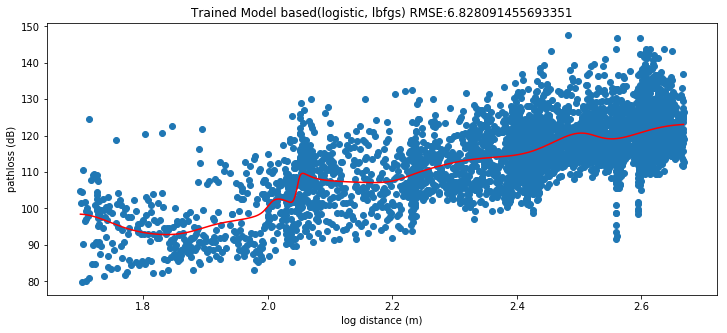

train_error(RMSE) : 6.828091455693351
validation_error(RMSE) : 6.8272962986298324
test_error(RMSE) : 7.007363563748374
-----------------------------------------------------------------------------------------------


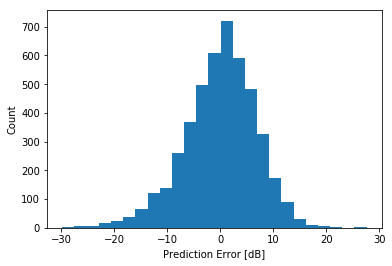

       Error(Noise) Distribution
count                4591.000000
mean                   -0.001341
std                     6.828835
min                   -29.828229
25%                    -3.989651
50%                     0.505271
75%                     4.590877
max                    27.660392


In [132]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_bh_34_train, y_bh_34_train, (1024, 512, 256, 128), 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_bh_34_train, y_bh_34_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_bh_34_train, y_bh_34_train, 'logistic', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_34_train, y_bh_34_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_34_val, y_bh_34_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_34_test, y_bh_34_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_bh_34_train), y_bh_34_train)

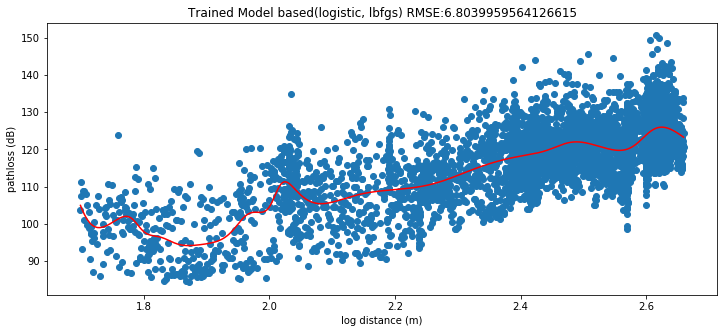

train_error(RMSE) : 6.8039959564126615
validation_error(RMSE) : 6.882061436688231
test_error(RMSE) : 6.826694135676699
-----------------------------------------------------------------------------------------------


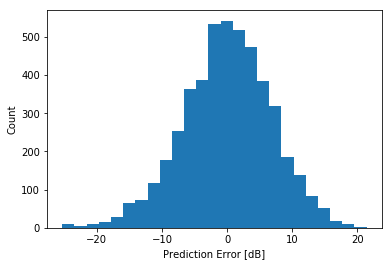

       Error(Noise) Distribution
count                4760.000000
mean                   -0.000095
std                     6.804711
min                   -25.288814
25%                    -4.280341
50%                     0.201771
75%                     4.571252
max                    21.406992


In [133]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_bh_53_train, y_bh_53_train, (1024, 512, 256, 128), 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_bh_53_train, y_bh_53_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_bh_53_train, y_bh_53_train, 'logistic', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_53_train, y_bh_53_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_53_val, y_bh_53_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_53_test, y_bh_53_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_bh_53_train), y_bh_53_train)

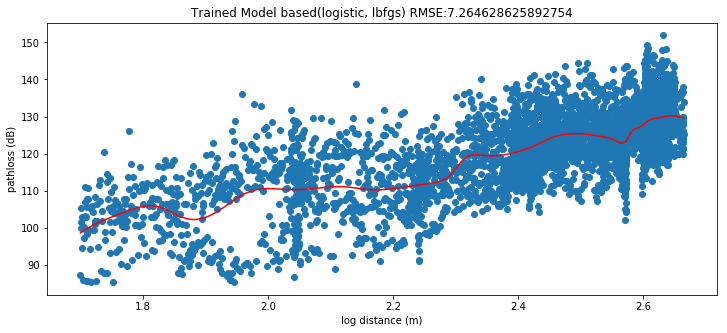

train_error(RMSE) : 7.264628625892754
validation_error(RMSE) : 7.65110230185495
test_error(RMSE) : 7.70927247576744
-----------------------------------------------------------------------------------------------


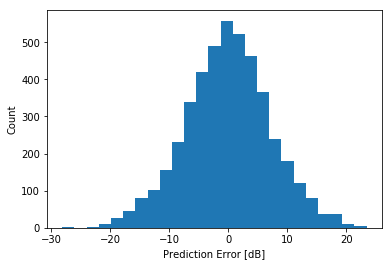

       Error(Noise) Distribution
count                4524.000000
mean                   -0.010870
std                     7.265424
min                   -28.096463
25%                    -4.671723
50%                     0.022215
75%                     4.664382
max                    23.471963


In [134]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_bh_64_train, y_bh_64_train, (1024, 512, 256, 128), 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_bh_64_train, y_bh_64_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_bh_64_train, y_bh_64_train, 'logistic', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_64_train, y_bh_64_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_64_val, y_bh_64_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_bh_64_test, y_bh_64_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_bh_64_train), y_bh_64_train)

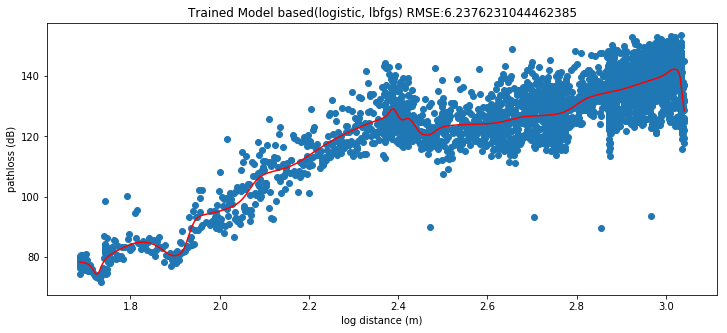

train_error(RMSE) : 6.2376231044462385
validation_error(RMSE) : 6.354972633745934
test_error(RMSE) : 6.248879541643237
-----------------------------------------------------------------------------------------------


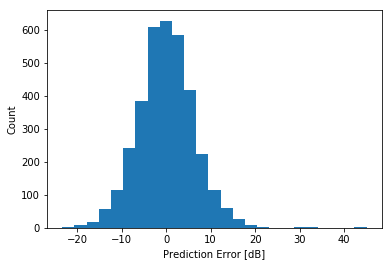

       Error(Noise) Distribution
count                3504.000000
mean                   -0.001255
std                     6.238513
min                   -23.391175
25%                    -3.918458
50%                     0.014461
75%                     3.889455
max                    45.098434


In [140]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_ma_34_train, y_ma_34_train, (60,60,60,60,60,60), 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_ma_34_train, y_ma_34_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_ma_34_train, y_ma_34_train, 'logistic', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_34_train, y_ma_34_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_34_val, y_ma_34_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_34_test, y_ma_34_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_ma_34_train), y_ma_34_train)

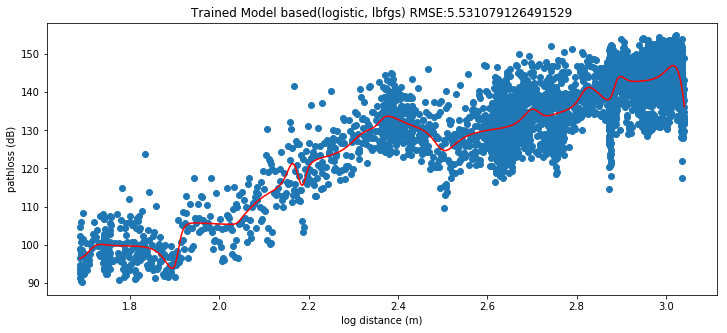

train_error(RMSE) : 5.531079126491529
validation_error(RMSE) : 5.8693014195993305
test_error(RMSE) : 5.54142995829457
-----------------------------------------------------------------------------------------------


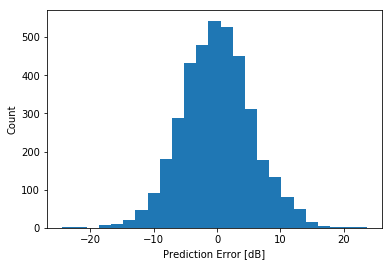

       Error(Noise) Distribution
count                3853.000000
mean                    0.004796
std                     5.531795
min                   -24.398771
25%                    -3.782110
50%                    -0.028837
75%                     3.529830
max                    23.601752


In [141]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_ma_53_train, y_ma_53_train, (60,60,60,60,60,60), 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_ma_53_train, y_ma_53_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_ma_53_train, y_ma_53_train, 'logistic', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_53_train, y_ma_53_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_53_val, y_ma_53_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_53_test, y_ma_53_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_ma_53_train), y_ma_53_train)

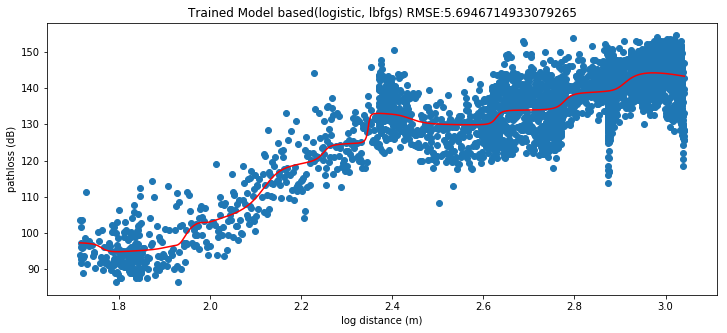

train_error(RMSE) : 5.6946714933079265
validation_error(RMSE) : 5.766235726995301
test_error(RMSE) : 5.659664937453635
-----------------------------------------------------------------------------------------------


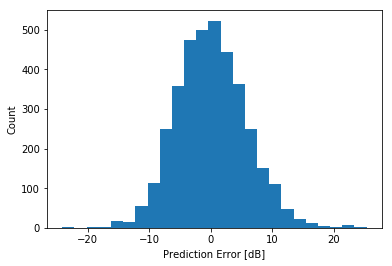

       Error(Noise) Distribution
count                3723.000000
mean                    0.072522
std                     5.694975
min                   -24.141189
25%                    -3.895535
50%                    -0.137542
75%                     3.728444
max                    25.296462


In [137]:
%autoreload

# mlp_regression(X, Y, hidden_layer, activation, loss, alpha = 0.01, learning_init=0.01)
model = mlp_regression(X_ma_64_train, y_ma_64_train, (60,60,60,60,60,60), 'logistic', 'lbfgs')

# mlp_prediction_error(model, X, Y)
rmse = mlp_prediction_error(model, X_ma_64_train, y_ma_64_train)

# mlp_train_graph(model, X, Y, activation, loss, rmse)
mlp_train_graph(model, X_ma_64_train, y_ma_64_train, 'logistic', 'lbfgs', rmse)

print("train_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_64_train, y_ma_64_train)))
print("validation_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_64_val, y_ma_64_val)))
print("test_error(RMSE) : " + str(mlp_prediction_error(model, X_ma_64_test, y_ma_64_test)))
print("-----------------------------------------------------------------------------------------------")
errorDist(mlp_prediction(model, X_ma_64_train), y_ma_64_train)